In [1]:
# Importimg the required libraries
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd

In [169]:
# Enable cache
ff1.Cache.enable_cache('cache')

# Setup plotting 
plotting.setup_mpl()

C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


In [2]:
# Load the data
# ff1.get_session(year, race, session)
# Q qualifying, FP1, FP2, FP3, R race

session = ff1.get_session(2021, "Qatar", "Q")

# Load session data
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) C:\Users\rhihi\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Qatar Grand Prix - Qualifying [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           I

In [171]:
best_ver = session.laps.pick_driver('VER').pick_fastest()

best_ver	

C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Time                      0 days 01:09:12.931000
Driver                                       VER
DriverNumber                                  33
LapTime                   0 days 00:01:22.109000
LapNumber                                   15.0
Stint                                        4.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:16.853000
Sector2Time               0 days 00:00:35.643000
Sector3Time               0 days 00:00:29.613000
Sector1SessionTime        0 days 01:08:07.675000
Sector2SessionTime        0 days 01:08:43.318000
Sector3SessionTime        0 days 01:09:12.931000
SpeedI1                                    295.0
SpeedI2                                    324.0
SpeedFL                                    225.0
SpeedST                                    324.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife            

In [3]:
# Selecting laps for verstappen and hamilton
laps_ver = session.laps.pick_drivers('VER')
laps_ham = session.laps.pick_drivers('RUS')

# laps_ver

In [4]:
# Get telemetry data for fastest lap
fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()
fastest_ham = laps_ham.pick_fastest().get_telemetry().add_distance()



C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] \
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] \
C:\Users\rhihi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\L

In [5]:
# Creating column name
fastest_ver['Driver'] = 'VER'
fastest_ham['Driver'] = 'RUS'


# Merging the data
telemetry = fastest_ver.append(fastest_ham)

C:\Users\rhihi\AppData\Local\Temp\ipykernel_33436\1413592882.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = fastest_ver.append(fastest_ham)


In [6]:
# we want 25 mini sectors 
num_mini_sectors = 25

# gran max value of distance that is known in telemetry
total_distance = max(telemetry['Distance'])

# create the mini sectors equally spaced
minisector_length = total_distance / num_mini_sectors

In [7]:
# init minisector variable
minisector = [0]

# adding multiple of minisectors_length to minisector
for i in range(0, (num_mini_sectors - 1)):
    minisector.append(minisector_length * (i + 1))


In [8]:
# creating Minisector column to know which minisector the car was at the moment the datapoint was recorded
telemetry['Minisector'] = telemetry['Distance'].apply(
		lambda dist: (
			int((dist // minisector_length) + 1)
		)
)

In [9]:
# calculating fastest driver per mini sector
avg_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()

In [179]:
avg_speed

,Minisector,Driver,Speed
0,1,HAM,260.615385
1,1,VER,260.461538
2,2,HAM,233.035714
3,2,VER,236.482759
4,3,HAM,219.600000
5,3,VER,216.766667
6,4,HAM,265.080000
7,4,VER,265.080000
8,5,HAM,279.173913
9,5,VER,279.869565


In [10]:
# Selecting the driver with the fastest speed per minisector
fastest_driver =  avg_speed.loc[avg_speed.groupby('Minisector')['Speed'].idxmax()]

# Remove speed column and rename driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest Driver'})

In [11]:
fastest_driver

,Minisector,Fastest Driver
0,1,RUS
3,2,VER
5,3,VER
7,4,VER
9,5,VER
11,6,VER
13,7,VER
15,8,VER
17,9,VER
19,10,VER


In [12]:
# mergind the fastest driver to the telemetry data
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

# Order the data by distance
telemetry = telemetry.sort_values(by=['Distance'])

# conver Ver to 1 and Ham to 2
telemetry.loc[telemetry['Fastest Driver'] == 'VER', 'Fastest Driver int'] = 1
telemetry.loc[telemetry['Fastest Driver'] == 'RUS', 'Fastest Driver int'] = 2


In [183]:
# telemetry

C:\Users\rhihi\AppData\Local\Temp\ipykernel_33436\1575358071.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('winter', 2) # plasma winter magma inferno viridis


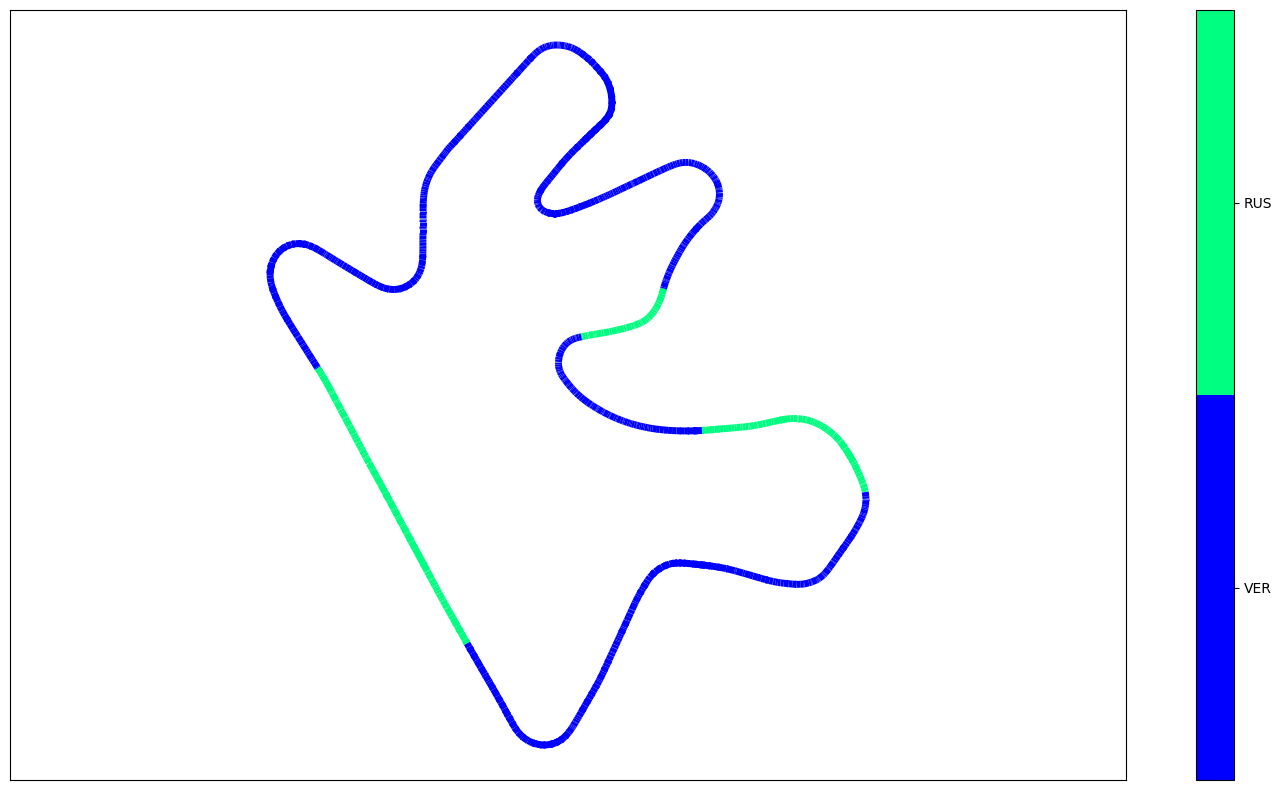

In [ ]:
# Extracting x and y coordinates
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

# Combining x and y coordinates
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest Driver int'].to_numpy().astype(float)

# Colorng the line based on the fastest driver
cmap = cm.get_cmap('winter', 2) # plasma winter magma inferno viridis
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap = cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

# making the plot bigger
plt.rcParams["figure.figsize"] = (18, 10)

# Plotting
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False,left=False,labelbottom=False,bottom=False)


# Adding legend
cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1, 4))  # Adjusted boundaries to match driver indices
cbar.set_ticks([1.5, 2.5])  # Setting exact tick locations for 'VER' and 'HAM'
cbar.set_ticklabels(['VER', 'RUS'])  # Correct number of labels

plt.savefig(f"2024_Qatar_Q_Ver_Rus.png")
plt.show()